# EECS 3401 Project 

## Filght Status Prediction


#### Can we predict if the flight is arriving late?

Dataset Overview:

The dataset used in this analysis contains information on thousands of flights, including details such as departure delays, arrival delays, airlines, airports, and more. We explore the dataset, preprocess the data, engineer relevant features, and train several machine learning models to predict flight delays.

Note: Selection of ATL for Model Training

Due to computational constraints and ATL's status as one of the world's busiest airports, our study exclusively trains models on data from Hartsfield-Jackson Atlanta International Airport. This focused approach ensures efficient use of resources while capturing diverse flight scenarios, enhancing the accuracy of our predictive models for flight delays and arrivals.

In [1]:
import zipfile
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Specify the path to your compressed folder and the CSV file inside
compressed_folder_path = 'Combined_Flights_2022.zip'
csv_file_name = 'Combined_Flights_2022.csv'

# Extract the contents of the ZIP file
with zipfile.ZipFile(compressed_folder_path, 'r') as zip_ref:
    zip_ref.extractall('path/to/extracted/folder')

# Create the full path to the extracted CSV file
csv_file_path = f'path/to/extracted/folder/{csv_file_name}'

# Read the CSV file using pandas
df = pd.read_csv(csv_file_path)
#df = pd.read_csv('Combined_Flights_2022.csv')
df.head(10)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0
5,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DEN,TUL,False,False,955,952.0,0.0,-3.0,...,1017.0,1234.0,4.0,1240,-2.0,0.0,-1.0,1200-1259,3,0
6,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,LCH,False,False,2139,2136.0,0.0,-3.0,...,2147.0,2213.0,5.0,2231,-13.0,0.0,-1.0,2200-2259,1,0
7,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",TYS,IAH,False,False,1129,1117.0,0.0,-12.0,...,1139.0,1255.0,16.0,1306,5.0,0.0,0.0,1300-1359,4,0
8,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,AEX,False,False,1424,1414.0,0.0,-10.0,...,1430.0,1507.0,6.0,1524,-11.0,0.0,-1.0,1500-1559,1,0
9,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,MOB,False,False,954,947.0,0.0,-7.0,...,1004.0,1104.0,6.0,1121,-11.0,0.0,-1.0,1100-1159,2,0


In [3]:
columns = df.columns
len(columns)

61

In [4]:
columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [43]:
# Getting info about the dataset
df.info

<bound method DataFrame.info of          FlightDate                                    Airline Origin Dest  \
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...             ...                                        ...    ...  ...   
4078313  2022-03-31                          Republic Airlines    MSY  EWR   
4078314  2022-03-17                          Republic Airlines    CLT  EWR   
4078315  2022-03-08                          Republic Airlines    ALB  ORD   
4078316  2022-03-25                          Republic Airlines    EWR  PIT   
4078317  2022-03-07                          Republic Airlines    EWR  RDU   

         Cancelled  Diverted  C

In [44]:
# total no of rows in the dataset
len(df.index)

4078318

In [6]:
# Getting the airport codes 
origin_airtport_city = df['Origin'].unique()
origin_airtport_city

array(['GJT', 'HRL', 'DRO', 'IAH', 'DEN', 'TYS', 'MOB', 'LNK', 'BHM',
       'IAD', 'ECP', 'AEX', 'LFT', 'BTR', 'ABQ', 'BUF', 'ALB', 'HSV',
       'TUL', 'CPR', 'CRP', 'EWR', 'DCA', 'STL', 'CVG', 'RIC', 'PVD',
       'CLT', 'GSO', 'ERI', 'ORD', 'LEX', 'ABE', 'CAK', 'AVL', 'DAY',
       'CHO', 'ROA', 'PWM', 'LIT', 'MKE', 'BTV', 'OMA', 'GRB', 'MLI',
       'SDF', 'FNT', 'CHS', 'PIT', 'TVC', 'ATW', 'DLH', 'ROC', 'SPI',
       'HPN', 'MBS', 'CID', 'MYR', 'CAE', 'SGF', 'AVP', 'GRR', 'DSM',
       'CLE', 'PIA', 'MSN', 'MDT', 'SBN', 'MEM', 'ICT', 'SHV', 'XNA',
       'DIK', 'GPT', 'PNS', 'LRD', 'LCH', 'MFE', 'FLG', 'BRO', 'SAF',
       'PQI', 'ORF', 'LGA', 'SYR', 'RDU', 'ILM', 'IND', 'PHL', 'CMH',
       'SCE', 'ITH', 'JAX', 'OKC', 'JAN', 'GSP', 'TXK', 'ELP', 'MAF',
       'AUS', 'IDA', 'BNA', 'SAV', 'AMA', 'ATL', 'BDL', 'BLI', 'BOI',
       'BOS', 'BUR', 'BWI', 'BZN', 'COS', 'DAL', 'DTW', 'EUG', 'FAT',
       'FLL', 'GEG', 'HDN', 'HNL', 'HOU', 'ISP', 'ITO', 'KOA', 'LAS',
       'LAX', 'LBB',

##### TOP 10 Busiest Airports 

In [7]:
# Getting the top 10 most busiest airports in USA for 2022
busiest_airports = df['Origin'].value_counts().nlargest(10)
busiest_airports

ATL    183697
ORD    172169
DFW    161218
DEN    158092
CLT    126088
LAX    111935
LGA    100260
SEA     98884
LAS     97674
PHX     96095
Name: Origin, dtype: int64

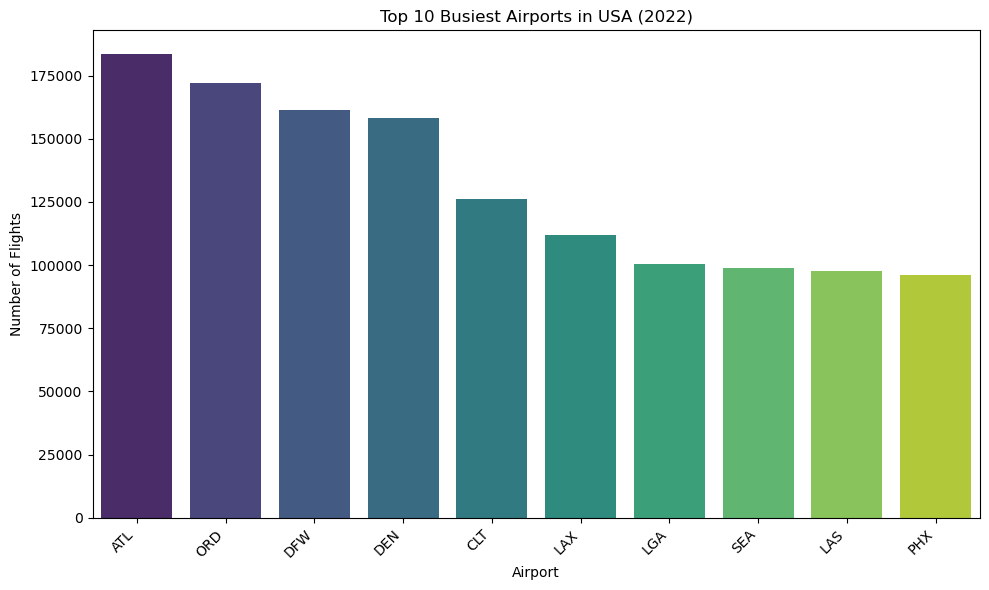

In [45]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_airports.index, y=busiest_airports.values, palette='viridis')
plt.title('Top 10 Busiest Airports in USA (2022)')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

------------------------ EDA Ends Here --------------------------

In [8]:
specific_origin_airport = ['ATL']#,'ORD','DFW','DEN','CLT']  # Replace with the airport code you're interested in
df_filtered = df[df['Origin'].isin(specific_origin_airport)]
df_filtered.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
1855,2022-04-01,Southwest Airlines Co.,ATL,AUS,False,False,820,832.0,12.0,12.0,...,845.0,1000.0,4.0,1000,4.0,0.0,0.0,1000-1059,4,0
1856,2022-04-01,Southwest Airlines Co.,ATL,AUS,False,False,1440,1505.0,25.0,25.0,...,1516.0,1625.0,7.0,1615,17.0,1.0,1.0,1600-1659,4,0
1857,2022-04-01,Southwest Airlines Co.,ATL,AUS,False,False,1955,2105.0,70.0,70.0,...,2123.0,2232.0,5.0,2135,62.0,1.0,4.0,2100-2159,4,0
1858,2022-04-01,Southwest Airlines Co.,ATL,BNA,False,False,1510,1547.0,37.0,37.0,...,1601.0,1539.0,8.0,1510,37.0,1.0,2.0,1500-1559,1,0
1859,2022-04-01,Southwest Airlines Co.,ATL,BNA,False,False,820,819.0,0.0,-1.0,...,833.0,813.0,5.0,835,-17.0,0.0,-2.0,0800-0859,1,0


In [9]:
# Create a new column 'Delay' based on the condition
'''
df_filtered['Delay'] = (df_filtered['DepDelayMinutes'] > 0).astype(int)
df_filtered[['Delay','DepDelayMinutes']]
'''

"\ndf_filtered['Delay'] = (df_filtered['DepDelayMinutes'] > 0).astype(int)\ndf_filtered[['Delay','DepDelayMinutes']]\n"

## Dropping Unwanted columns

These columns represent unique IDs and code which don't provide much value
in the training the model and are unrealated to the data analysis.

In [10]:
# List of columns to drop (IDs)
id_columns_to_drop = ['DOT_ID_Marketing_Airline', 'DOT_ID_Operating_Airline', 'OriginAirportID',
                      'OriginAirportSeqID', 'OriginCityMarketID', 'DestAirportID', 'DestAirportSeqID',
                      'DestCityMarketID', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline',
                      'IATA_Code_Marketing_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number',
                      'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
                   'OriginCityName', 'OriginState', 'DestCityName', 'DestState',
                      'OriginStateName','OriginStateFips','OriginWac'
                  ,'DestStateName','DestStateFips','DestWac','Operating_Airline']

# Drop ID columns from the DataFrame
df_filtered = df_filtered.drop(columns=id_columns_to_drop)

# Print data types of the remaining columns
print(df_filtered.dtypes)

FlightDate               object
Airline                  object
Origin                   object
Dest                     object
Cancelled                  bool
Diverted                   bool
CRSDepTime                int64
DepTime                 float64
DepDelayMinutes         float64
DepDelay                float64
ArrTime                 float64
ArrDelayMinutes         float64
AirTime                 float64
CRSElapsedTime          float64
ActualElapsedTime       float64
Distance                float64
Year                      int64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
DepDel15                float64
DepartureDelayGroups    float64
DepTimeBlk               object
TaxiOut                 float64
WheelsOff               float64
WheelsOn                float64
TaxiIn                  float64
CRSArrTime                int64
ArrDelay                float64
ArrDel15                float64
ArrivalD

## 4. Prepare the data for Machine Learning algorithms.

### - Exploring the columns.

In [11]:
columns = df_filtered.columns
len(columns)

35

In [12]:
len(df_filtered.index)

183697

In [13]:
airlines = df_filtered['Airline'].unique()
len(airlines)

14

In [14]:
dest = df_filtered['Dest'].unique()
len(dest)

154

In [15]:
df_filtered[['DepDelay','DepDelayMinutes','ArrTimeBlk','DepTimeBlk','FlightDate','Origin','Dest','DepartureDelayGroups']]

,DepDelay,DepDelayMinutes,ArrTimeBlk,DepTimeBlk,FlightDate,Origin,Dest,DepartureDelayGroups
1855,12.0,12.0,1000-1059,0800-0859,2022-04-01,ATL,AUS,0.0
1856,25.0,25.0,1600-1659,1400-1459,2022-04-01,ATL,AUS,1.0
1857,70.0,70.0,2100-2159,1900-1959,2022-04-01,ATL,AUS,4.0
1858,37.0,37.0,1500-1559,1500-1559,2022-04-01,ATL,BNA,2.0
1859,-1.0,0.0,0800-0859,0800-0859,2022-04-01,ATL,BNA,-1.0
...,...,...,...,...,...,...,...,...
4077926,11.0,11.0,2100-2159,1900-1959,2022-03-31,ATL,IAD,0.0
4077960,35.0,35.0,2200-2259,1900-1959,2022-03-31,ATL,EWR,2.0
4078230,29.0,29.0,2200-2259,1900-1959,2022-03-24,ATL,EWR,1.0
4078259,149.0,149.0,1900-1959,1700-1759,2022-03-13,ATL,EWR,9.0


We can observe follwing - 
1. There are 20 unique airlines taking off from the Atlante airport. This information is required in model training.
2. There are 300 destination.
3. ArrTimeBlk and DepTimeBlk columns are represent hourly intervals so we will take in consideration the start of the hour
for example - '1000-1059' we will on consider '10' hours.
4. The columns representing _Delay and _DelayMinutes represent same things but have slight differnce in handling early departures and early arrivals
for our model we to check by using both columns separtly and compare which contributes to more accurate models.
5. Orgin column will be dropped cause its redundant for us.
6. We will also drop the year and quarter columns, the  main reason for that is we are taking data from year 2022 thats why its totally 
useless for us.
7. We need to convert the columns reperesenting time in 'hhmm' format using sine and cosine function to capture their cyclical nature,
if we don't do so then the ml algorithms will plot time as continous form which is not the case
8. The columns 'ActualElapsedTime','ArrDelayMinutes','ArrDel15', don't provide any value because they tell you that it is delayed by this much time or if it is delayed by 15 mins or not, and we are trying to predict Delayed status

### - Dropping the uneccesary columns

In [16]:
# dropping columns that are not useful for model training.
# Initially we will drop the ArrDelay and DepDelay for the first run
list_cols_drop_ml = ['FlightDate','Year','Dest', 'DepDelay','ArrDelay','Quarter', 'Origin']
df_filtered = df_filtered.drop(columns=list_cols_drop_ml)
print(df_filtered.dtypes)



Airline                  object
Cancelled                  bool
Diverted                   bool
CRSDepTime                int64
DepTime                 float64
DepDelayMinutes         float64
ArrTime                 float64
ArrDelayMinutes         float64
AirTime                 float64
CRSElapsedTime          float64
ActualElapsedTime       float64
Distance                float64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
DepDel15                float64
DepartureDelayGroups    float64
DepTimeBlk               object
TaxiOut                 float64
WheelsOff               float64
WheelsOn                float64
TaxiIn                  float64
CRSArrTime                int64
ArrDel15                float64
ArrivalDelayGroups      float64
ArrTimeBlk               object
DistanceGroup             int64
DivAirportLandings        int64
dtype: object


Further we can only consider the columns that are directly contribute to the factors leading to delay in departures.

In [17]:
columns_to_keep = [
    'TaxiIn', 'TaxiOut','ArrDel15','DepDel15','DayofMonth','Month',
    'DepTime' ,'WheelsOff', 'WheelsOn', 'Distance','CRSDepTime','CRSArrTime',
     'Airline','AirTime'
]

df_filtered = df_filtered[columns_to_keep]



In [18]:
df_filtered.head()

,TaxiIn,TaxiOut,ArrDel15,DepDel15,DayofMonth,Month,DepTime,WheelsOff,WheelsOn,Distance,CRSDepTime,CRSArrTime,Airline,AirTime
1855,4.0,13.0,0.0,0.0,1,4,832.0,845.0,1000.0,813.0,820,1000,Southwest Airlines Co.,135.0
1856,7.0,11.0,1.0,1.0,1,4,1505.0,1516.0,1625.0,813.0,1440,1615,Southwest Airlines Co.,129.0
1857,5.0,18.0,1.0,1.0,1,4,2105.0,2123.0,2232.0,813.0,1955,2135,Southwest Airlines Co.,129.0
1858,8.0,14.0,1.0,1.0,1,4,1547.0,1601.0,1539.0,214.0,1510,1510,Southwest Airlines Co.,38.0
1859,5.0,14.0,0.0,0.0,1,4,819.0,833.0,813.0,214.0,820,835,Southwest Airlines Co.,40.0


In [19]:
columns = df_filtered.columns
print('Total columns - ' + str(len(columns)))

Total columns - 14


### - Handling columns with value in 'hhmm' format

In [20]:
# Columns that are in the "hhmm" format
df_filtered[['CRSDepTime','DepTime','CRSArrTime','WheelsOff',
             'WheelsOn']]


,CRSDepTime,DepTime,CRSArrTime,WheelsOff,WheelsOn
1855,820,832.0,1000,845.0,1000.0
1856,1440,1505.0,1615,1516.0,1625.0
1857,1955,2105.0,2135,2123.0,2232.0
1858,1510,1547.0,1510,1601.0,1539.0
1859,820,819.0,835,833.0,813.0
...,...,...,...,...,...
4077926,1929,1940.0,2120,1957.0,2108.0
4077960,1952,2027.0,2220,2050.0,2221.0
4078230,1947,2016.0,2200,2105.0,23.0
4078259,1704,1933.0,1918,1955.0,2145.0


In [21]:
time_columns = ['CRSDepTime','DepTime','CRSArrTime','WheelsOff',
                'WheelsOn']

for column in time_columns:
    # Extract hour and minute
    df_filtered[column + '_hour'] = df_filtered[column] // 100
    df_filtered[column + '_minute'] = df_filtered[column] % 100

    # Apply trigonometric transformations
    df_filtered[column + '_sin'] = np.sin(2 * np.pi * (df_filtered[column + '_hour'] * 60 + df_filtered[column + '_minute']) / (24 * 60))
    df_filtered[column + '_cos'] = np.cos(2 * np.pi * (df_filtered[column + '_hour'] * 60 + df_filtered[column + '_minute']) / (24 * 60))

    # Drop the original columns
    df_filtered = df_filtered.drop(columns=[column, column + '_hour', column + '_minute'])

# Print data types of the updated DataFrame
print(df_filtered.dtypes)

TaxiIn            float64
TaxiOut           float64
ArrDel15          float64
DepDel15          float64
DayofMonth          int64
Month               int64
Distance          float64
Airline            object
AirTime           float64
CRSDepTime_sin    float64
CRSDepTime_cos    float64
DepTime_sin       float64
DepTime_cos       float64
CRSArrTime_sin    float64
CRSArrTime_cos    float64
WheelsOff_sin     float64
WheelsOff_cos     float64
WheelsOn_sin      float64
WheelsOn_cos      float64
dtype: object


##### Explaination -

1. **Converting 'hhmm' to Minutes:**
   - `df_filtered[column + '_hour'] * 60 + df_filtered[column + '_minute']`: This part converts the 'hhmm' format to minutes. It takes the hour component, multiplies it by 60 to convert to minutes, and adds the minute component.

2. **Normalizing to [0, 1):**
   - `(df_filtered[column + '_hour'] * 60 + df_filtered[column + '_minute']) / (24 * 60)`: This part normalizes the minutes to the range [0, 1) by dividing by the total number of minutes in a day (24 hours * 60 minutes).

3. **Trigonometric Transformations:**
   - `2 * np.pi * ...`: This part scales the normalized time to the range [0, 2π), making it suitable for trigonometric functions.

   - `np.sin(...)`: This calculates the sine of the scaled, normalized time. The sine function produces a wave-like pattern with values between -1 and 1. It captures the cyclical nature of time, where similar times of day will have similar sine values.

   - `np.cos(...)`: Similarly, this calculates the cosine of the scaled, normalized time. The cosine function is another periodic function that is shifted relative to the sine function. It provides an additional perspective on the cyclical pattern.

In summary, the sine and cosine transformations encode the time information into two continuous features that capture both the cyclicality and the phase (shift) within the day. This encoding is often beneficial for machine learning models to capture the temporal patterns in a way that respects the circular nature of time. The resulting features (`column + '_sin'` and `column + '_cos'`) can be used as inputs to your machine learning model for predicting flight cancellations.

### - Handling missing values in the dataset

In [23]:
# Verify that missing values are filled
missing_values = df_filtered.isnull().sum()
print("Missing Values :")
print(missing_values)

Missing Values :
TaxiIn            3453
TaxiOut           3425
ArrDel15          3845
DepDel15          3388
DayofMonth           0
Month                0
Distance             0
Airline              0
AirTime           3845
CRSDepTime_sin       0
CRSDepTime_cos       0
DepTime_sin       3388
DepTime_cos       3388
CRSArrTime_sin       0
CRSArrTime_cos       0
WheelsOff_sin     3425
WheelsOff_cos     3425
WheelsOn_sin      3453
WheelsOn_cos      3453
dtype: int64


In [24]:
# Verify that missing values are filled
missing_values = df_filtered[df['ArrDel15']==1].isnull().sum()
print("Missing Values :")
print(missing_values)

Missing Values :
TaxiIn            0
TaxiOut           0
ArrDel15          0
DepDel15          0
DayofMonth        0
Month             0
Distance          0
Airline           0
AirTime           0
CRSDepTime_sin    0
CRSDepTime_cos    0
DepTime_sin       0
DepTime_cos       0
CRSArrTime_sin    0
CRSArrTime_cos    0
WheelsOff_sin     0
WheelsOff_cos     0
WheelsOn_sin      0
WheelsOn_cos      0
dtype: int64


C:\Users\aumpa\AppData\Local\Temp\ipykernel_12060\4205238897.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_values = df_filtered[df['ArrDel15']==1].isnull().sum()


In [25]:
df_filtered['ArrDel15'].value_counts()

0.0    144410
1.0     35442
Name: ArrDel15, dtype: int64

<strong>Notes:</strong>

These columns will be filled by most frequent items.
- 'DepDel15' column has binary column that has 1 if the flight was delaued by 15 mins and 0 if not. We will fill it using most frequent item.
- 'Origin' and 'Airline' represent origin airport and flight airlines taking off those airports. For this we are considering 5 airports and 20 airlines. 

 These columns would be filled with mean of each columns respectively.
- 'DepDelayMinutes' is difference in minutes between scheduled and actual departure time. Early departures set to 0. 
- 'TaxiIn' and 'TaxiOut' are taxi in and taxi out time represented in minutes.
- 'AirTime' is flight duration time, in minutes.
- 'DepartureDelayGroups' Departure Delay intervals, every (15 minutes from 180)
-  [DepTime_sin	DepTime_cos	WheelsOff_sin	WheelsOff_cos	WheelsOn_sin	WheelsOn_cos] this columns were in hhmm format then converted using sine and cosine function to capture cylical nature of time. Thus, they all represent time. 

<strong>Pipeline</strong>


In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [27]:

# Define numerical and categorical columns
num_cols = df_filtered.select_dtypes(include='number').columns.to_list()
cat_cols = df_filtered.select_dtypes(exclude='number').columns.to_list()

# Remove the target column from numerical columns
num_cols.remove('DepDel15')
num_cols.remove('ArrDel15')


In [28]:
# Create pipelines for numerical and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Use ColumnTransformer to set the estimators and transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ],
    remainder='passthrough'
)


In [29]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['TaxiIn', 'TaxiOut', 'DayofMonth', 'Month',
                                  'Distance', 'AirTime', 'CRSDepTime_sin',
                                  'CRSDepTime_cos', 'DepTime_sin',
                                  'DepTime_cos', 'CRSArrTime_sin',
                                  'CRSArrTime_cos', 'WheelsOff_sin',
                                  'WheelsOff_cos', 'WheelsOn_sin',
                                  'WheelsOn_cos']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Airline'])])

In [30]:
# Apply the preprocessing pipeline on the dataset
df_prepared = preprocessor.fit_transform(df_filtered)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names = preprocessor.get_feature_names_out()

df_prepared = pd.DataFrame(data=df_prepared, columns=feature_names)

df_prepared.head()

,num__TaxiIn,num__TaxiOut,num__DayofMonth,num__Month,num__Distance,num__AirTime,num__CRSDepTime_sin,num__CRSDepTime_cos,num__DepTime_sin,num__DepTime_cos,...,cat__Airline_Frontier Airlines Inc.,cat__Airline_JetBlue Airways,cat__Airline_Mesa Airlines Inc.,cat__Airline_Republic Airlines,cat__Airline_SkyWest Airlines Inc.,cat__Airline_Southwest Airlines Co.,cat__Airline_Spirit Air Lines,cat__Airline_United Air Lines Inc.,remainder__ArrDel15,remainder__DepDel15
0,-0.473227,-0.357425,-1.681281,-0.041593,0.318981,0.669132,1.552464,-0.473714,1.531226,-0.556689,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.060996,-0.654760,-1.681281,-0.041593,0.318981,0.569899,-0.651478,-0.760555,-0.789315,-0.668592,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,-0.295153,0.385911,-1.681281,-0.041593,0.318981,0.569899,-1.004152,1.097934,-0.741916,1.417297,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.239070,-0.208758,-1.681281,-0.041593,-0.919552,-0.935133,-0.793925,-0.625748,-0.964345,-0.457300,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,-0.295153,-0.208758,-1.681281,-0.041593,-0.919552,-0.902055,1.552464,-0.473714,1.582904,-0.489320,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
missing_values_count = df_prepared.isnull().sum()
print("Missing Values Count for Each Column:")
print(missing_values_count)


Missing Values Count for Each Column:
num__TaxiIn                               0
num__TaxiOut                              0
num__DayofMonth                           0
num__Month                                0
num__Distance                             0
num__AirTime                              0
num__CRSDepTime_sin                       0
num__CRSDepTime_cos                       0
num__DepTime_sin                          0
num__DepTime_cos                          0
num__CRSArrTime_sin                       0
num__CRSArrTime_cos                       0
num__WheelsOff_sin                        0
num__WheelsOff_cos                        0
num__WheelsOn_sin                         0
num__WheelsOn_cos                         0
cat__Airline_Alaska Airlines Inc.         0
cat__Airline_American Airlines Inc.       0
cat__Airline_Comair Inc.                  0
cat__Airline_Delta Air Lines Inc.         0
cat__Airline_Endeavor Air Inc.            0
cat__Airline_Envoy Air                

In [32]:
# data types of the columns
data_types = df_prepared.dtypes
print("Data Types of Columns:")
print(data_types)


Data Types of Columns:
num__TaxiIn                            float64
num__TaxiOut                           float64
num__DayofMonth                        float64
num__Month                             float64
num__Distance                          float64
num__AirTime                           float64
num__CRSDepTime_sin                    float64
num__CRSDepTime_cos                    float64
num__DepTime_sin                       float64
num__DepTime_cos                       float64
num__CRSArrTime_sin                    float64
num__CRSArrTime_cos                    float64
num__WheelsOff_sin                     float64
num__WheelsOff_cos                     float64
num__WheelsOn_sin                      float64
num__WheelsOn_cos                      float64
cat__Airline_Alaska Airlines Inc.      float64
cat__Airline_American Airlines Inc.    float64
cat__Airline_Comair Inc.               float64
cat__Airline_Delta Air Lines Inc.      float64
cat__Airline_Endeavor Air Inc.       

In [33]:
df_prepared = df_prepared.dropna(subset=['remainder__ArrDel15', 'remainder__DepDel15'])

<strong>Notes:</strong>

- Columns prefixed with num__ are numerical features.
- Columns prefixed with cat__ are one-hot encoded categorical features.
- The column remainder__Diverted_binary is the binary feature for Diverted_binary.

All columns are of type float64, which might be due to the encoding performed during preprocessing. However, the columns representing binary features (Cancelled_binary and Diverted_binary) should ideally be of integer type (0 or 1) instead of float. We may need to convert these columns to integer type if they are supposed to represent binary values. Additionally, it seems that Cancelled_binary is missing from the output. We need to ensure that it's properly included in the preprocessing pipeline.

In [34]:
# Converting target column to Int
# Convert binary columns to integer type
df_prepared['remainder__ArrDel15'] = df_prepared['remainder__ArrDel15'].astype(int)
df_prepared['remainder__DepDel15'] = df_prepared['remainder__DepDel15'].astype(int)



In [35]:
df_prepared.shape

(179852, 32)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define X (features) and y (target)
X = df_prepared.drop(['remainder__ArrDel15'],axis=1)
y = df_prepared['remainder__ArrDel15']


In [37]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((143881, 31), (143881,), (35971, 31), (35971,))

In [39]:

# Train Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9676405993717161


In [42]:

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9635817742070001


In [41]:

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)


Logistic Regression Accuracy: 0.9322787801284368


c:\Users\aumpa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
